In [1]:
!pip install opencv-python

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Clone the YOLO repository
!git clone https://github.com/pjreddie/darknet.git


Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [4]:
# Move into the darknet directory
%cd darknet

# Compile darknet (you need to have GPU enabled in Colab Runtime for faster inference)
!make

# Download YOLOv3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

# Download YOLOv3 configuration file
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg

# Download COCO names file
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names

# Copy the object image from the original path to the darknet directory
!cp /content/object.jpg /content/darknet

# Run the object detection script
import cv2
import numpy as np

#  Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getUnconnectedOutLayersNames()

# Load image


/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

Object: person, Confidence: 1.00
Object: person, Confidence: 1.00
Object: dog, Confidence: 1.00


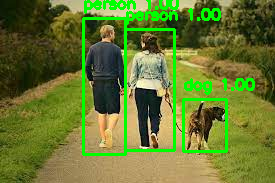

/content


In [5]:
image = cv2.imread("/content/gdrive/MyDrive/images (1).jpeg")
height, width, _ = image.shape

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(layer_names)

# Get class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get confidence, class id, and bounding box coordinates
confidences = []
class_ids = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Adjust confidence threshold as needed
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression to remove overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes and print class names
for i in range(len(boxes)):
    if i in indices:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        confidence = confidences[i]
        print(f"Object: {label}, Confidence: {confidence:.2f}")
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the result
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Move back to the parent directory
%cd ..
